# Name: Sourabh Barala
# Course: M.Sc. Data Science
# Year: 1st
# Reg. No.: 23MSD7044
# Subject: Machine Learning and its Applications
#
#
#
#
#
#

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
cs_churn=pd.read_csv('churn_prediction.csv')

In [3]:
cs_churn.head(5)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
cs_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [5]:
cs_churn.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


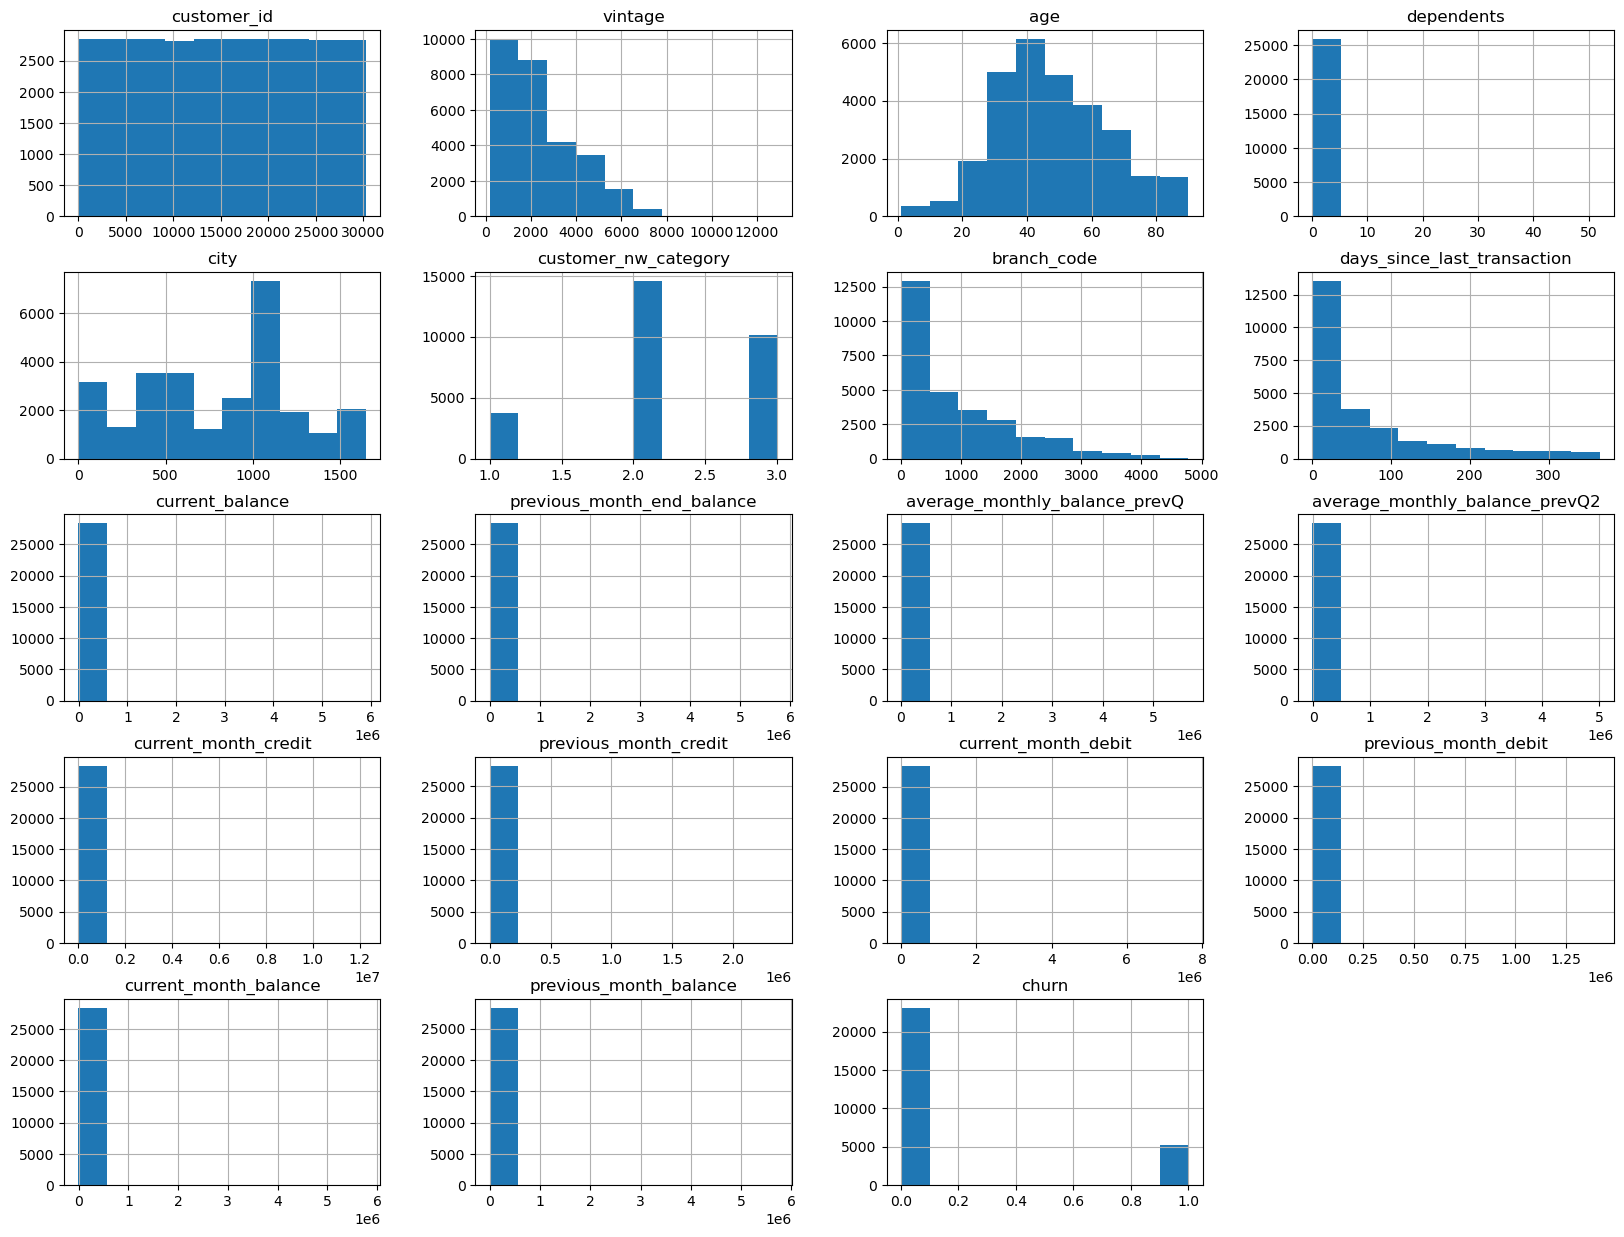

In [6]:
cs_churn.hist(figsize=(20,15))
plt.show()

In [7]:
cs_churn=cs_churn.dropna(subset=['gender','occupation'])

In [8]:
train_cs_churn,test_cs_churn=train_test_split(cs_churn,random_state=100,stratify=cs_churn['churn'],test_size=0.2)

In [9]:
cs_churn=train_cs_churn.copy()

In [10]:
def give_numeric_cols(data):
    numeric_cols=[]
    for i in range(len(data.dtypes)):
        if (data.dtypes[i]==int) or (data.dtypes[i]==float):
            numeric_cols.append(data.columns[i])
            
    return numeric_cols
def give_object_cols(data):
    object_cols=[]
    for i in range(len(data.dtypes)):
        if (data.dtypes[i]==object):
            object_cols.append(data.columns[i])

    return object_cols
object_cols=give_object_cols(cs_churn)
numeric_cols=give_numeric_cols(cs_churn)

In [11]:
numeric_cols

['customer_id',
 'vintage',
 'age',
 'dependents',
 'city',
 'customer_nw_category',
 'branch_code',
 'days_since_last_transaction',
 'current_balance',
 'previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'current_month_credit',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance',
 'churn']

In [12]:
cs_churn[numeric_cols].corr()['churn']

customer_id                      -0.002786
vintage                          -0.066560
age                              -0.024549
dependents                        0.037517
city                              0.004658
customer_nw_category              0.010780
branch_code                       0.036540
days_since_last_transaction      -0.058468
current_balance                  -0.040551
previous_month_end_balance        0.015128
average_monthly_balance_prevQ     0.027654
average_monthly_balance_prevQ2    0.033217
current_month_credit              0.020538
previous_month_credit             0.044486
current_month_debit               0.044859
previous_month_debit              0.087918
current_month_balance            -0.008767
previous_month_balance            0.033667
churn                             1.000000
Name: churn, dtype: float64

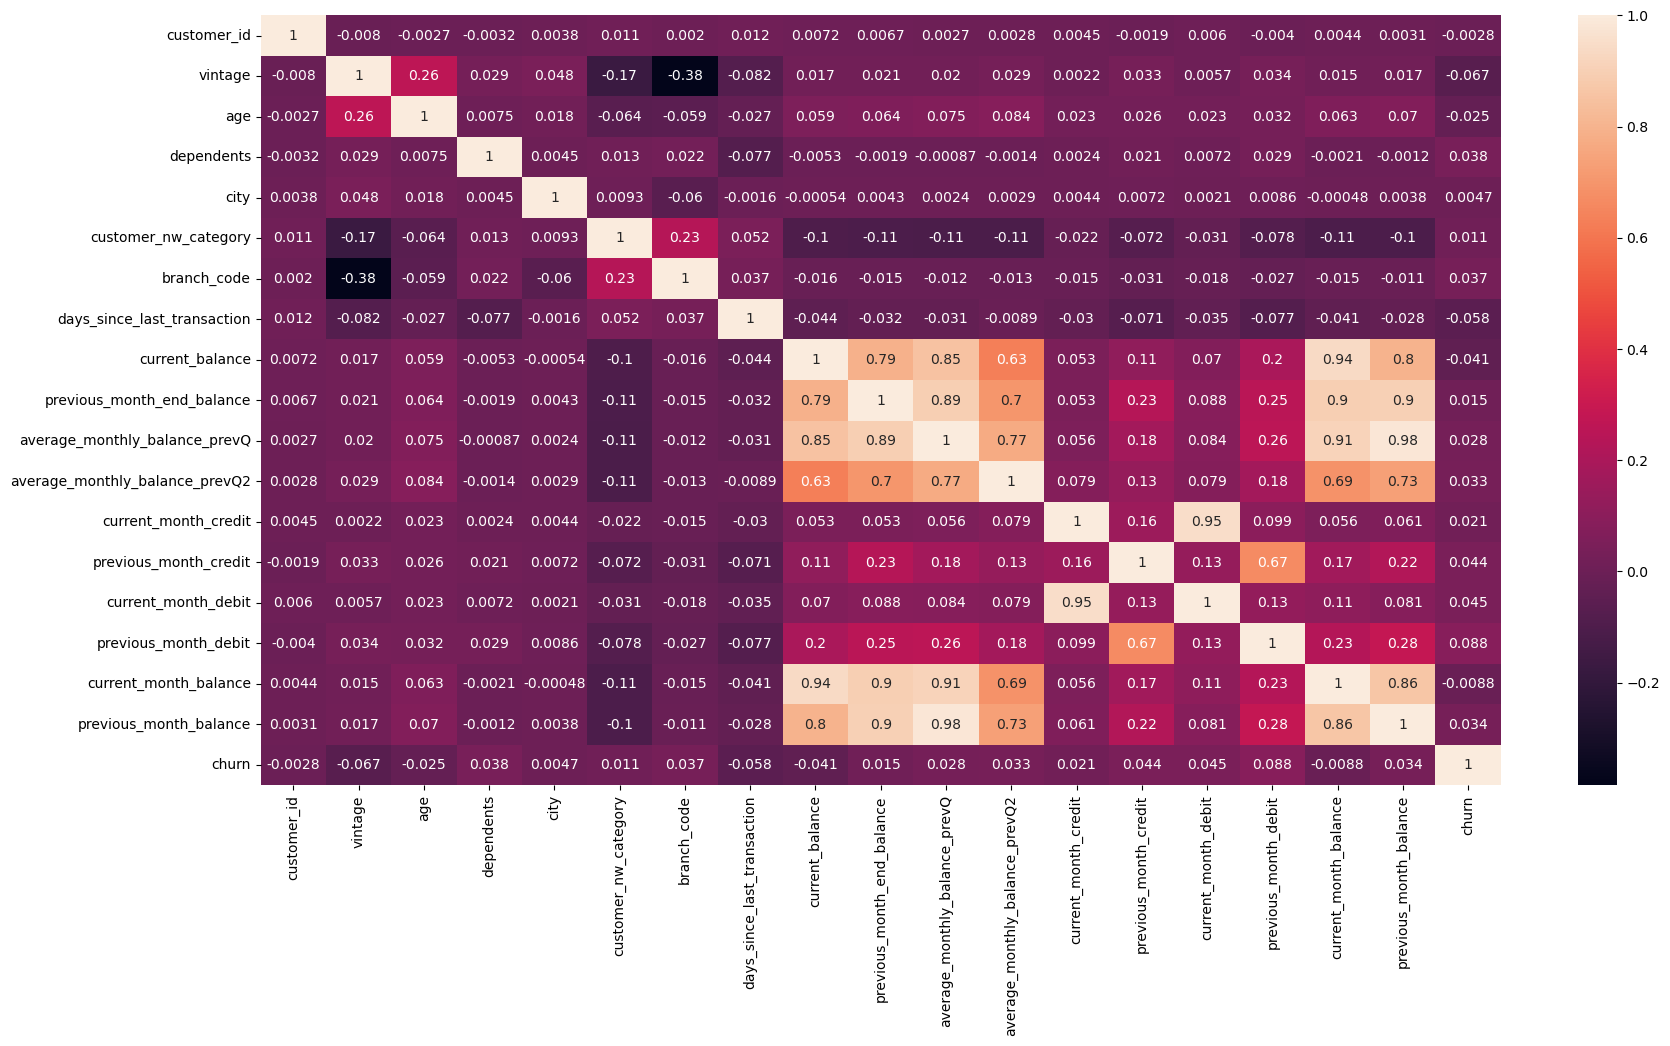

In [13]:
plt.figure(figsize=(20,10))
seaborn.heatmap(cs_churn[numeric_cols].corr(),annot=True)
plt.show()

In [33]:
train_parameters=train_cs_churn.drop(['churn','customer_id'],axis=1)
train_lebels=train_cs_churn['churn']
test_parameters=test_cs_churn.drop(['churn','customer_id'],axis=1)
test_lebels=test_cs_churn['churn']

In [15]:
train_parameters.isnull().sum()

vintage                              0
age                                  0
gender                               0
dependents                        1772
occupation                           0
city                               630
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       2515
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
dtype: int64

In [65]:


class CleanNumericData(BaseEstimator,TransformerMixin):
    def __init__(self,method='median',fill_value=0):
        self.method=method
        self.fill_value=fill_value
        
    def fit(self,data):
        return self

    def transform(self,data):
        data=data.dropna(subset=['gender','occupation'])
        imputer=SimpleImputer(strategy=self.method)
        num_cols=give_numeric_cols(data)
        X=imputer.fit_transform(data[num_cols])
        X_df=pd.DataFrame(X,columns=num_cols,index=data.index)
        
        from sklearn.preprocessing import StandardScaler
        scaler=StandardScaler()
        X=scaler.fit_transform(X_df)
        
        import numpy as np
        
        X=np.around(X,decimals=4)
        X_df=pd.DataFrame(X,columns=num_cols,index=data.index)
        return X_df
    
    
class encode_category(BaseEstimator,TransformerMixin):
    def __init__(self,method=0):
        self.method=method
        
    def fit(self,data):
        return self
    
    def transform(self,data):
        data=data.dropna(subset=['gender','occupation'])
        encoder=OneHotEncoder()
        cat_cols=give_object_cols(data)
        X=encoder.fit_transform(data[cat_cols])
        X_df=pd.DataFrame(X.toarray(), columns=encoder.get_feature_names_out(cat_cols),index=data.index)
        return X_df
    

num_pipeline=Pipeline([
    ('cleaner',CleanNumericData()),
    # ('standard_scaler',StandardScaler())
])

cat_pipeline=Pipeline([
    ('cat',encode_category())
])

full_pipeline=ColumnTransformer([
    ('num',num_pipeline, train_parameters.columns),
    ('cat',cat_pipeline,give_object_cols(train_parameters)),
])


def transform_data(data):
    
    indexes=num_pipeline.fit_transform(data).index
    
    transformed=full_pipeline.fit_transform(data)
    col_names=['vintage','age','dependents','city','customer_nw_category','branch_code','days_since_last_transaction', 'current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance','previous_month_balance','gender_Female', 'gender_Male','occupation_company','occupation_retired', 'occupation_salaried', 'occupation_self_employed','occupation_student']
    transformed_df=pd.DataFrame(transformed, columns=col_names,index=indexes)
    return transformed_df

In [66]:
cc=cat_pipeline.fit_transform(train_parameters)
cc


,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
13401,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13998,0.0,1.0,0.0,0.0,0.0,1.0,0.0
27572,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6449,0.0,1.0,0.0,1.0,0.0,0.0,0.0
15774,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
565,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8565,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12346,1.0,0.0,0.0,0.0,0.0,1.0,0.0
11376,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
nn=num_pipeline.fit_transform(train_parameters)
nn

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
13401,-1.1129,-0.2605,-0.3238,-1.7727,1.1671,0.5720,-0.7477,-0.0336,-0.0219,-0.0589,-0.1728,0.0559,-0.0599,0.1141,-0.1294,0.0098,-0.0757
13998,-1.2970,0.0326,-0.3238,0.2502,-0.3509,1.3938,1.7324,-0.1936,-0.1838,-0.1892,-0.1593,-0.0402,-0.1106,-0.0631,-0.1543,-0.1931,-0.1780
27572,1.1742,-1.0226,-0.3238,1.0131,-0.3509,-0.8775,-0.7111,-0.2879,-0.2708,-0.2227,-0.2624,-0.0269,-0.0423,-0.0333,0.2107,-0.3000,-0.2607
6449,-0.1898,1.1464,-0.3238,0.5792,-0.3509,-0.8796,-0.4301,-0.1997,-0.1920,-0.2037,-0.1931,-0.0402,-0.1106,-0.0590,-0.1487,-0.2017,-0.1910
15774,-0.5941,0.9119,-0.3238,-1.5207,-0.3509,1.5633,-0.6256,-0.0509,-0.0993,0.0649,-0.1992,-0.0069,-0.1106,-0.0302,0.1260,-0.1121,0.1162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.9379,0.0326,-0.3238,0.4625,-0.3509,0.4047,-0.1980,0.1318,0.2713,0.2639,0.0513,-0.0402,-0.0802,-0.0538,-0.1473,0.2429,0.2569
8565,0.1330,-0.7881,-0.3238,1.8461,-0.3509,-0.5791,-0.5645,-0.2905,-0.2450,-0.2346,-0.1210,-0.0235,0.0416,-0.0195,0.0699,-0.2799,-0.1510
12346,0.4589,-0.2019,-0.3238,-1.1731,-1.8688,-0.2732,-0.4301,-0.2410,-0.2370,-0.2519,-0.2554,-0.0402,-0.1106,-0.0631,-0.1543,-0.2477,-0.2364
11376,0.3239,-1.0812,-0.3238,-0.9071,-1.8688,-0.7571,-0.5889,2.7519,2.6231,2.7842,4.5911,-0.0339,-0.0916,-0.0631,-0.1543,2.7802,2.5942


In [68]:
transformed_train=transform_data(train_parameters)

In [69]:
transformed_test=transform_data(test_parameters)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model=LogisticRegression(max_iter=10000)

In [72]:
model.fit(transformed_train,train_lebels)

LogisticRegression(max_iter=10000)

In [74]:
pred=model.predict(transformed_test)

In [78]:
from sklearn.metrics import recall_score,accuracy_score

## Recall

In [79]:
recall_score(y_true=test_lebels,y_pred=pred)

0.13702623906705538

## Accuracy

In [80]:
accuracy_score(y_true=test_lebels,y_pred=pred)

0.8294043548677343